# Machine Learning in Computational Biology
## Course Project
## 2 class problem classification - Results and Plots notebook
#### Papadopoulou Marianna, ID:7115152200032
#### Vossos Charalampos, ID:7115152200037
#### Fillipidou Thalassini-Marina, ID:7115152200022

This notebook presents the results of the metrics and the corresponding plots generated for the binary classification problem.(All the optimization steps in order to result in these hyperparameters and features are in the notebook "*Papadopoulou_Fillipidou_Vossos_Final_Project_2class_classification*")
In order to replicate the findings outlined in this academic document, please follow the steps below:

1.	Open the notebook provided using Google Colab
2.	Access the data section of the environment by clicking on the folder icon located on the left side. Then, upload the final_data.csv file and the matrices obtained from the feature selection methods. These files are provided within the exercise's zip file. To upload them, simply drag and drop the files into the designated area.
3. Run the cells in the notebook in the order they appear, making sure to follow the instructions provided in each cell.

When executing the notebook in Jupyter, it is essential to ensure that the necessary packages have been installed. Additionally, it is important to specify the path to the dataset and then the feature matrices as an input parameter for the *pd.read_csv()* and *np.load()* functions.

# Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, matthews_corrcoef, balanced_accuracy_score, f1_score, fbeta_score, recall_score, precision_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

# Load dataset (csv file containing only 1500 most variant genes)


The *final_data.csv* has undergone a filtering process resulting in the inclusion of only the 1500 genes with the highest degree of variation, as suggested by the authors. In the present study, a subsequent feature selection was conducted on the aforementioned genes, resulting in the retention of 300 of them.

In [2]:
final_data = pd.read_csv('final_df.csv') # Load dataset

In [3]:
final_data # print the dataframe

,cell,ENSG00000205542,ENSG00000198804,ENSG00000167996,ENSG00000198712,ENSG00000156508,ENSG00000087086,ENSG00000075624,ENSG00000229117,ENSG00000026025,...,ENSG00000185565,cluster_2,cluster_4,cluster_7,cluster_8,cluster_11,cluster_18,cluster_23,cluster_31,cluster_37
0,ERR2538859-AAACCTGAGACCACGA,32962.305,9065.20200,8240.5760,5350.2246,4735.2563,5042.7400,4950.4950,9255.0700,3659.0615,...,0.00000,1,3,3,3,2,2,19,17,12
1,ERR2538859-AAACCTGTCTGATACG,34861.200,0.00000,5579.0670,0.0000,16139.4430,4519.0444,3873.4666,12696.3620,3443.0813,...,0.00000,2,2,6,7,7,3,6,6,1
2,ERR2538859-AAACGGGAGTGTTGAA,17791.770,9193.14500,4845.0840,3431.0170,13334.9840,4739.7560,1061.1393,14643.7230,2193.0212,...,70.74262,1,1,1,1,1,14,14,26,26
3,ERR2538859-AAAGATGTCCGAACGC,26513.914,10016.36700,7070.3770,5564.6484,10540.0990,4058.9202,3404.2556,7725.0415,8837.9720,...,65.46645,1,4,5,5,10,18,22,28,33
4,ERR2538859-AAAGTAGGTTAGTGGG,30791.666,18116.04300,7291.2870,7347.3735,5664.7690,5384.3350,2636.0806,8469.1100,3140.8620,...,0.00000,1,4,4,6,5,7,20,11,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,ERR2538860-TTTGGTTTCGTTACGA,20833.332,11986.30100,5707.7627,6849.3150,6563.9270,5707.7627,3139.2693,14554.7940,1141.5525,...,0.00000,1,2,5,4,3,9,3,5,5
1423,ERR2538860-TTTGTCAAGCCCAACC,73876.350,172.20595,13776.4760,0.0000,5510.5903,9126.9150,18598.2420,10160.1510,7577.0615,...,0.00000,2,2,6,7,7,3,6,25,1
1424,ERR2538860-TTTGTCACATTGGGCC,22690.557,14539.58000,3524.7466,4038.7722,10060.2140,2570.1277,3671.6110,8003.4385,6094.8745,...,0.00000,1,1,2,2,4,13,13,12,8
1425,ERR2538860-TTTGTCAGTTGCGTTA,54775.516,5771.68550,11874.2080,2830.3457,6992.6187,11654.3640,8047.0615,8713.0250,6160.1640,...,0.00000,1,1,2,2,6,8,7,13,11


In [ ]:
final_data.iloc[:,1:-9].describe() # get some metrics - insights for our data

,ENSG00000205542,ENSG00000198804,ENSG00000167996,ENSG00000198712,ENSG00000156508,ENSG00000087086,ENSG00000075624,ENSG00000229117,ENSG00000026025,ENSG00000140988,...,ENSG00000241553,ENSG00000106399,ENSG00000124570,ENSG00000115241,ENSG00000136750,ENSG00000087191,ENSG00000177570,ENSG00000159593,ENSG00000075292,ENSG00000185565
count,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,...,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000
mean,23073.534930,8650.527128,5923.673285,3736.152417,9964.531828,5336.618798,3445.616828,10249.066012,4835.244087,8811.534498,...,92.887396,79.839794,106.011364,100.806927,52.863068,91.540287,66.629208,83.553927,83.486104,74.001188
std,14606.218348,6231.215400,3978.366456,3176.106282,3128.099835,3097.064109,3089.279249,3003.599890,2833.676900,2619.908290,...,123.475297,123.462932,123.362171,123.351179,123.306581,123.258291,123.158420,123.154015,123.077177,123.061641
min,0.000000,0.000000,0.000000,0.000000,519.750550,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12010.673500,5857.477250,3613.406200,2114.959000,7905.214150,3500.865600,1524.513650,8470.981500,2970.992100,7075.414250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19893.205000,8106.062500,4752.475600,3190.216800,9968.712000,4730.031200,2520.325400,10225.563000,4359.533700,8729.360000,...,66.361410,41.077885,79.897720,78.033554,0.000000,65.447170,0.000000,59.108643,57.430004,16.608261
75%,30962.057500,10570.919000,6922.972700,4744.304200,12098.396000,6380.133300,4423.490000,12113.780000,6219.104000,10508.414000,...,133.770455,122.567923,156.668740,150.009385,64.803280,133.415230,101.162477,122.458970,117.766025,110.686830
max,151105.110000,100249.940000,38342.453000,43321.300000,18940.480000,39224.000000,39814.400000,23356.402000,25552.280000,18648.018000,...,1295.336800,1297.577900,1039.501100,1245.330000,1992.032000,1144.492100,2490.660000,1497.379600,1781.472800,1850.709500


# Split dataset to features and labels

In [4]:
# Separate features and target variable
X = final_data.iloc[:,1:-9]
y_labels = final_data.iloc[:,-9:]

# Split dataset to two sets(training and test)


The test set is always completely hidden from all the procedures

In [5]:
# We get the labels that correspond to the 2 cluster results of the authors, since we experiment with a binary classification here
y = y_labels['cluster_2']
y = np.where(y == 1, 0, 1)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
# Convert y to a 1-dimensional array
y = np.ravel(y)

In [8]:
# Split the dataset into training/validation set and test set using scikit's function train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Fit the classifier with best parameters and features found using ANOVA

## SVC



### Get best parameters and make predictions

In [28]:
# Load the saved array from file
best_features = np.load('best_features_ANOVA_SVC.npy')

The 'selected_features_indices' list contains a set of integers, which are theindices of features that have been selected from the original feature set.
These indices correspond to the selected features in the data

X_test_selected will store the subset of the test data X_test, containing only the selected features. This is achieved by slicing the original test data using the indices stored in'selected_features_indices'.

In [29]:
selected_features_indices = [i for i, value in enumerate(best_features) if value]
X_test_selected = X_test[:, selected_features_indices]

In [30]:
X_train_val_selected_final_features = X_train_val[:, selected_features_indices] # do the same filter as above in order to get the corresponding features to train the classifier

In [ ]:
X_test_selected.shape

(286, 300)

In [31]:
best_classifier_SVC = SVC(C=3.807947176588889, degree=2, gamma=0.951207163345817, kernel='linear') # define the classifier and its parameters

In [32]:
best_classifier_SVC.fit(X_train_val_selected_final_features, y_train_val) # fit the classifier to the train data

SVC(C=3.807947176588889, degree=2, gamma=0.951207163345817, kernel='linear')

In [33]:
y_test_pred = best_classifier_SVC.predict(X_test_selected) # make prediction on the test set using the trained classifier

In [34]:
# Compute the metroc scores
balanced_acc_SVC = balanced_accuracy_score(y_test, y_test_pred)
precision_SVC = precision_score(y_test, y_test_pred)
recall_SVC = recall_score(y_test, y_test_pred)
f1_SVC = f1_score(y_test, y_test_pred)

In [35]:
# Printing the metrics
print("Balanced Accuracy:", balanced_acc_SVC)
print("Precision:", precision_SVC)
print("Recall:", recall_SVC)
print("F1 Score:", f1_SVC)

Balanced Accuracy: 0.9666252072968491
Precision: 0.85
Recall: 0.9444444444444444
F1 Score: 0.8947368421052632


### Feature Importance

In [ ]:
# Get the coefficients and support vectors
coefs = best_classifier_SVC.coef_
support_vectors = best_classifier_SVC.support_vectors_

# Calculate the feature importance scores
feature_importance = np.abs(np.dot(coefs, support_vectors.T))

# Get the top 20 indices of the feature importance scores
top20_indices = np.argsort(feature_importance[0])[-20:]

# Print the top 20 indices
print(top20_indices)

[36 42 51 55 25 29 43 28 38 41 46 48 40 52 47 30 49 33 31 24]


In [ ]:
top20_indices_SVC= pd.Series(top20_indices).sort_values(ascending=False) # turn the top20_indices array to a set and sort it

In [ ]:
# Filter the DataFrame using the boolean array
data_filtered_features = final_data.iloc[:,1:-9].loc[:, best_features]

# Print the filtered DataFrame
data_filtered_features

,ENSG00000205542,ENSG00000198804,ENSG00000198712,ENSG00000075624,ENSG00000229117,ENSG00000111640,ENSG00000198938,ENSG00000034510,ENSG00000198886,ENSG00000187514,...,ENSG00000197081,ENSG00000078674,ENSG00000153982,ENSG00000085117,ENSG00000135069,ENSG00000105392,ENSG00000091164,ENSG00000006625,ENSG00000241553,ENSG00000106399
0,32962.305,9065.20200,5350.2246,4950.4950,9255.0700,6949.1420,2982.5964,5442.4697,4119.83250,7287.3750,...,118.27511,184.490510,61.496834,47.390750,184.490510,101.367905,61.496834,61.496834,30.748417,215.238920
1,34861.200,0.00000,0.0000,3873.4666,12696.3620,9038.0890,0.0000,8177.3180,0.00000,6670.9700,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,645.577760,0.000000,215.192580,215.192580
2,17791.770,9193.14500,3431.0170,1061.1393,14643.7230,6402.2075,3218.7893,3324.9033,3606.52640,3360.2747,...,219.23100,0.000000,115.996070,106.113940,0.000000,70.742620,70.742620,35.371310,35.371310,0.000000
3,26513.914,10016.36700,5564.6484,3404.2556,7725.0415,3076.9233,2029.4601,8707.0380,3927.98730,1767.5942,...,130.93290,130.932900,0.000000,189.144900,65.466450,261.865800,130.932900,0.000000,0.000000,0.000000
4,30791.666,18116.04300,7347.3735,2636.0806,8469.1100,4655.2060,6449.9844,3084.7751,5833.02930,2187.3860,...,0.00000,112.173645,56.086823,168.260470,56.086823,196.303880,0.000000,56.086823,224.347290,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,20833.332,11986.30100,6849.3150,3139.2693,14554.7940,3995.4336,7420.0913,6563.9270,5993.15040,3424.6575,...,0.00000,0.000000,0.000000,285.388120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1423,73876.350,172.20595,0.0000,18598.2420,10160.1510,7921.4736,0.0000,7404.8560,516.61786,1894.2654,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,516.617860,0.000000,0.000000,0.000000
1424,22690.557,14539.58000,4038.7722,3671.6110,8003.4385,8150.9766,5140.2554,2202.9666,5433.98440,4259.0690,...,0.00000,220.296660,0.000000,73.432220,146.864440,264.356000,146.864440,73.432220,0.000000,0.000000
1425,54775.516,5771.68550,2830.3457,8047.0615,8713.0250,9101.5040,2830.3457,2663.8547,2608.35800,11376.8800,...,147.99194,221.987900,55.496975,194.239410,166.490920,0.000000,221.987900,0.000000,55.496975,55.496975


In [ ]:
# Get the column names corresponding to the series indices
column_names_SVC = data_filtered_features.columns[top20_indices_SVC.index]

# Print the column names
print(column_names_SVC)

Index(['ENSG00000075624', 'ENSG00000197958', 'ENSG00000198712',
       'ENSG00000288299', 'ENSG00000184009', 'ENSG00000074800',
       'ENSG00000145423', 'ENSG00000198938', 'ENSG00000198804',
       'ENSG00000187514', 'ENSG00000198899', 'ENSG00000198886',
       'ENSG00000205542', 'ENSG00000256618', 'ENSG00000108107',
       'ENSG00000084207', 'ENSG00000111640', 'ENSG00000034510',
       'ENSG00000229117', 'ENSG00000111057'],
      dtype='object')


## Logistic Regression

### Get best parameters and make predictions

In [37]:
# Load the saved array from file
best_features = np.load('best_features_ANOVA_LR.npy')

The 'selected_features_indices' list contains a set of integers, which are theindices of features that have been selected from the original feature set. These indices correspond to the selected features in the data

X_test_selected will store the subset of the test data X_test, containing only the selected features. This is achieved by slicing the original test data using the indices stored in'selected_features_indices'

In [10]:
selected_features_indices = [i for i, value in enumerate(best_features) if value]
X_test_selected = X_test[:, selected_features_indices]

In [11]:
X_train_val_selected_final_features = X_train_val[:, selected_features_indices] # perform the same filtering on the training set in order to fit the classifier

In [ ]:
X_test_selected.shape

(286, 300)

In [12]:
best_classifier_LG = LogisticRegression(C=95.07143113384855, solver='newton-cg',tol=0.0003751655787285152)

In [13]:
best_classifier_LG.fit(X_train_val_selected_final_features, y_train_val)

LogisticRegression(C=95.07143113384855, solver='newton-cg',
                   tol=0.0003751655787285152)

In [14]:
y_test_pred = best_classifier_LG.predict(X_test_selected) # make prediction on the test set

In [15]:
# Compute the metrics' scores
balanced_acc_LR = balanced_accuracy_score(y_test, y_test_pred)
accuracy_LR = accuracy_score(y_test, y_test_pred)
precision_LR = precision_score(y_test, y_test_pred)
recall_LR = recall_score(y_test, y_test_pred)
f1_LR = f1_score(y_test, y_test_pred)

In [16]:
# Printing the metrics
print("Balanced Accuracy:", balanced_acc_LR)
print("Accuracy:", accuracy_LR)
print("Precision:", precision_LR)
print("Recall:", recall_LR)
print("F1 Score:", f1_LR)

Balanced Accuracy: 0.9684908789386402
Accuracy: 0.9895104895104895
Precision: 0.8947368421052632
Recall: 0.9444444444444444
F1 Score: 0.918918918918919


### Feature importance

In [20]:
coefs=best_classifier_LG.coef_ # 'coefs' contains the coefficient values of the features from the best linear classifier 'best_classifier_LR'.

# The loop iterates through the rows of the 'coefs' array, where each row represents the coefficients for a specific class or category.
# 'np.shape(coefs)[0]' returns the number of rows (classes/categories) in the 'coefs' array.
for i in range(0,np.shape(coefs)[0]):

    # 'np.argsort(coefs[i])' sorts the coefficients in ascending order and returns the corresponding indices.
    # '[-20:]' takes the last 20 indices, which correspond to the top 20 features with the highest coefficients
    top20_indices=np.argsort(coefs[i])[-20:]

    print(top20_indices) # Print the 'top20_indices' for the current class or category, showing the indices of the top 20 features with the highest coefficients.

[107 210  75  84  57  18 294 181 170 114 116 196  53 104  29 270 102 103
  90 174]


In [21]:
top20_indices_LR= pd.Series(top20_indices).sort_values(ascending=False)

In [22]:
# Filter the DataFrame using the boolean array
data_filtered_features = final_data.iloc[:,1:-9].loc[:, best_features]

# Print the filtered DataFrame
data_filtered_features

,ENSG00000205542,ENSG00000198804,ENSG00000198712,ENSG00000075624,ENSG00000229117,ENSG00000111640,ENSG00000198938,ENSG00000034510,ENSG00000198886,ENSG00000187514,...,ENSG00000197081,ENSG00000078674,ENSG00000153982,ENSG00000085117,ENSG00000135069,ENSG00000105392,ENSG00000091164,ENSG00000006625,ENSG00000241553,ENSG00000106399
0,32962.305,9065.20200,5350.2246,4950.4950,9255.0700,6949.1420,2982.5964,5442.4697,4119.83250,7287.3750,...,118.27511,184.490510,61.496834,47.390750,184.490510,101.367905,61.496834,61.496834,30.748417,215.238920
1,34861.200,0.00000,0.0000,3873.4666,12696.3620,9038.0890,0.0000,8177.3180,0.00000,6670.9700,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,645.577760,0.000000,215.192580,215.192580
2,17791.770,9193.14500,3431.0170,1061.1393,14643.7230,6402.2075,3218.7893,3324.9033,3606.52640,3360.2747,...,219.23100,0.000000,115.996070,106.113940,0.000000,70.742620,70.742620,35.371310,35.371310,0.000000
3,26513.914,10016.36700,5564.6484,3404.2556,7725.0415,3076.9233,2029.4601,8707.0380,3927.98730,1767.5942,...,130.93290,130.932900,0.000000,189.144900,65.466450,261.865800,130.932900,0.000000,0.000000,0.000000
4,30791.666,18116.04300,7347.3735,2636.0806,8469.1100,4655.2060,6449.9844,3084.7751,5833.02930,2187.3860,...,0.00000,112.173645,56.086823,168.260470,56.086823,196.303880,0.000000,56.086823,224.347290,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,20833.332,11986.30100,6849.3150,3139.2693,14554.7940,3995.4336,7420.0913,6563.9270,5993.15040,3424.6575,...,0.00000,0.000000,0.000000,285.388120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1423,73876.350,172.20595,0.0000,18598.2420,10160.1510,7921.4736,0.0000,7404.8560,516.61786,1894.2654,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,516.617860,0.000000,0.000000,0.000000
1424,22690.557,14539.58000,4038.7722,3671.6110,8003.4385,8150.9766,5140.2554,2202.9666,5433.98440,4259.0690,...,0.00000,220.296660,0.000000,73.432220,146.864440,264.356000,146.864440,73.432220,0.000000,0.000000
1425,54775.516,5771.68550,2830.3457,8047.0615,8713.0250,9101.5040,2830.3457,2663.8547,2608.35800,11376.8800,...,147.99194,221.987900,55.496975,194.239410,166.490920,0.000000,221.987900,0.000000,55.496975,55.496975


In [ ]:
# Get the column names corresponding to the series indices
column_names_LR = data_filtered_features.columns[top20_indices_LR.index]

# Print the column names
print(column_names_LR)

Index(['ENSG00000198938', 'ENSG00000084207', 'ENSG00000198804',
       'ENSG00000184009', 'ENSG00000034510', 'ENSG00000111057',
       'ENSG00000198886', 'ENSG00000145423', 'ENSG00000187514',
       'ENSG00000205542', 'ENSG00000197958', 'ENSG00000256618',
       'ENSG00000288299', 'ENSG00000108107', 'ENSG00000075624',
       'ENSG00000198712', 'ENSG00000229117', 'ENSG00000198899',
       'ENSG00000074800', 'ENSG00000111640'],
      dtype='object')


## GaussianNB

### Get best parameters and make predictions

In [38]:
# Load the saved array from file
best_features = np.load('best_features_ANOVA_GNB.npy')

The 'selected_features_indices' list contains a set of integers, which are theindices of features that have been selected from the original feature set. These indices correspond to the selected features in the data

X_test_selected will store the subset of the test data X_test, containing only the selected features. This is achieved by slicing the original test data using the indices stored in'selected_features_indices'

In [39]:
selected_features_indices = [i for i, value in enumerate(best_features) if value]
X_test_selected = X_test[:, selected_features_indices]

In [40]:
X_train_val_selected_final_features = X_train_val[:, selected_features_indices] # perform the same filtering to te training set, with which we will fit the classifier

In [ ]:
X_test_selected.shape

(286, 300)

In [41]:
best_classifier_GNB = GaussianNB(var_smoothing=0.0008094845352286139)

In [42]:
best_classifier_GNB.fit(X_train_val_selected_final_features, y_train_val)

GaussianNB(var_smoothing=0.0008094845352286139)

In [43]:
y_test_pred = best_classifier_GNB.predict(X_test_selected) # make prediction using the fitted classifier

In [44]:
# Compute the metrics' scores
balanced_acc_GNB = balanced_accuracy_score(y_test, y_test_pred)
accuracy_GNB = accuracy_score(y_test, y_test_pred)
precision_GNB = precision_score(y_test, y_test_pred)
recall_GNB = recall_score(y_test, y_test_pred)
f1_GNB = f1_score(y_test, y_test_pred)

In [45]:
# Printing the metrics
print("Balanced Accuracy:", balanced_acc_GNB)
print("Accuracy:", accuracy_GNB)
print("Precision:", precision_GNB)
print("Recall:", recall_GNB)
print("F1 Score:", f1_GNB)

Balanced Accuracy: 0.8314676616915423
Accuracy: 0.9755244755244755
Precision: 0.9230769230769231
Recall: 0.6666666666666666
F1 Score: 0.7741935483870968


## Random Forest

### Get best parameters and make predictions

In [46]:
# Load the saved array from file
best_features = np.load('best_features_ANOVA_RF.npy')

The 'selected_features_indices' list contains a set of integers, which are theindices of features that have been selected from the original feature set. These indices correspond to the selected features in the data

X_test_selected will store the subset of the test data X_test, containing only the selected features. This is achieved by slicing the original test data using the indices stored in'selected_features_indices'

In [47]:
selected_features_indices = [i for i, value in enumerate(best_features) if value]
X_test_selected = X_test[:, selected_features_indices]

In [48]:
X_train_val_selected_final_features = X_train_val[:, selected_features_indices] # perform the same filtering to the training set

In [ ]:
X_test_selected.shape

(286, 300)

In [49]:
best_classifier_RF = RandomForestClassifier(n_estimators=152, max_depth=28,min_samples_split=61,min_samples_leaf=3,bootstrap=False)

In [50]:
best_classifier_RF.fit(X_train_val_selected_final_features, y_train_val)

RandomForestClassifier(bootstrap=False, max_depth=28, min_samples_leaf=3,
                       min_samples_split=61, n_estimators=152)

In [51]:
y_test_pred = best_classifier_RF.predict(X_test_selected) # make predictions on test set

In [115]:
# Compute metrics' scores
balanced_acc_RF = balanced_accuracy_score(y_test, y_test_pred)
accuracy_RF = accuracy_score(y_test, y_test_pred)
precision_RF = precision_score(y_test, y_test_pred)
recall_RF = recall_score(y_test, y_test_pred)
f1_RF = f1_score(y_test, y_test_pred)

In [53]:
# Printing the metrics
print("Balanced Accuracy:", balanced_acc_RF)
print("Accuracy:", accuracy_RF)
print("Precision:", precision_RF)
print("Recall:", recall_RF)
print("F1 Score:", f1_RF)

Balanced Accuracy: 0.9444444444444444
Accuracy: 0.993006993006993
Precision: 1.0
Recall: 0.8888888888888888
F1 Score: 0.9411764705882353


### Feature importance

In [54]:
# Filter the DataFrame using the boolean array
data_filtered_features = final_data.iloc[:,1:-9].loc[:, best_features]

# Print the filtered DataFrame
data_filtered_features

,ENSG00000205542,ENSG00000198804,ENSG00000198712,ENSG00000075624,ENSG00000229117,ENSG00000111640,ENSG00000198938,ENSG00000034510,ENSG00000198886,ENSG00000187514,...,ENSG00000197081,ENSG00000078674,ENSG00000153982,ENSG00000085117,ENSG00000135069,ENSG00000105392,ENSG00000091164,ENSG00000006625,ENSG00000241553,ENSG00000106399
0,32962.305,9065.20200,5350.2246,4950.4950,9255.0700,6949.1420,2982.5964,5442.4697,4119.83250,7287.3750,...,118.27511,184.490510,61.496834,47.390750,184.490510,101.367905,61.496834,61.496834,30.748417,215.238920
1,34861.200,0.00000,0.0000,3873.4666,12696.3620,9038.0890,0.0000,8177.3180,0.00000,6670.9700,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,645.577760,0.000000,215.192580,215.192580
2,17791.770,9193.14500,3431.0170,1061.1393,14643.7230,6402.2075,3218.7893,3324.9033,3606.52640,3360.2747,...,219.23100,0.000000,115.996070,106.113940,0.000000,70.742620,70.742620,35.371310,35.371310,0.000000
3,26513.914,10016.36700,5564.6484,3404.2556,7725.0415,3076.9233,2029.4601,8707.0380,3927.98730,1767.5942,...,130.93290,130.932900,0.000000,189.144900,65.466450,261.865800,130.932900,0.000000,0.000000,0.000000
4,30791.666,18116.04300,7347.3735,2636.0806,8469.1100,4655.2060,6449.9844,3084.7751,5833.02930,2187.3860,...,0.00000,112.173645,56.086823,168.260470,56.086823,196.303880,0.000000,56.086823,224.347290,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,20833.332,11986.30100,6849.3150,3139.2693,14554.7940,3995.4336,7420.0913,6563.9270,5993.15040,3424.6575,...,0.00000,0.000000,0.000000,285.388120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1423,73876.350,172.20595,0.0000,18598.2420,10160.1510,7921.4736,0.0000,7404.8560,516.61786,1894.2654,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,516.617860,0.000000,0.000000,0.000000
1424,22690.557,14539.58000,4038.7722,3671.6110,8003.4385,8150.9766,5140.2554,2202.9666,5433.98440,4259.0690,...,0.00000,220.296660,0.000000,73.432220,146.864440,264.356000,146.864440,73.432220,0.000000,0.000000
1425,54775.516,5771.68550,2830.3457,8047.0615,8713.0250,9101.5040,2830.3457,2663.8547,2608.35800,11376.8800,...,147.99194,221.987900,55.496975,194.239410,166.490920,0.000000,221.987900,0.000000,55.496975,55.496975


In [55]:
feature_scores = pd.Series(best_classifier_RF.feature_importances_).sort_values(ascending=False)

In [56]:
# Get the column names corresponding to the series indices
column_names_RF = data_filtered_features.columns[feature_scores.index]

# Print the column names
print(column_names_RF)

Index(['ENSG00000198804', 'ENSG00000198938', 'ENSG00000198886',
       'ENSG00000198727', 'ENSG00000198712', 'ENSG00000198899',
       'ENSG00000269028', 'ENSG00000198840', 'ENSG00000198763',
       'ENSG00000173212',
       ...
       'ENSG00000284916', 'ENSG00000211451', 'ENSG00000135637',
       'ENSG00000135046', 'ENSG00000158270', 'ENSG00000162924',
       'ENSG00000285132', 'ENSG00000123636', 'ENSG00000171314',
       'ENSG00000143320'],
      dtype='object', length=300)


In [57]:
# Get the column names corresponding to the series indices above the threshold
filtered_column_names = data_filtered_features.columns[feature_scores[feature_scores > 0.01].index]

# Print the filtered column names
print(filtered_column_names)

Index(['ENSG00000198804', 'ENSG00000198938', 'ENSG00000198886',
       'ENSG00000198727', 'ENSG00000198712', 'ENSG00000198899',
       'ENSG00000269028', 'ENSG00000198840', 'ENSG00000198763',
       'ENSG00000173212', 'ENSG00000144649', 'ENSG00000198786',
       'ENSG00000256618', 'ENSG00000198888', 'ENSG00000168014',
       'ENSG00000225890', 'ENSG00000140279', 'ENSG00000075624',
       'ENSG00000236418', 'ENSG00000167680', 'ENSG00000282017',
       'ENSG00000198513'],
      dtype='object')


## XGBoost

### Get best parameters and make predictions

In [59]:
# Load the saved array from file
best_features = np.load('best_features_ANOVA_XG.npy')

The 'selected_features_indices' list contains a set of integers, which are theindices of features that have been selected from the original feature set. These indices correspond to the selected features in the data

X_test_selected will store the subset of the test data X_test, containing only the selected features. This is achieved by slicing the original test data using the indices stored in'selected_features_indices'

In [60]:
selected_features_indices = [i for i, value in enumerate(best_features) if value]
X_test_selected = X_test[:, selected_features_indices]

In [61]:
X_train_val_selected_final_features = X_train_val[:, selected_features_indices] # perform the same filtering on the training set

In [ ]:
X_test_selected.shape

(286, 300)

In [62]:
best_classifier_XG = XGBClassifier(n_estimators= 55,max_depth= 19,learning_rate= 0.03329019834400153,subsample= 0.831261142176991,colsample_bytree= 0.6558555380447055,gamma= 2.600340105889054,min_child_weight= 3)

In [63]:
best_classifier_XG.fit(X_train_val_selected_final_features, y_train_val)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6558555380447055, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.600340105889054, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03329019834400153, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=55, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [64]:
y_test_pred = best_classifier_XG.predict(X_test_selected) # make predictions on test set

In [65]:
# Compute metrics' scores
balanced_acc_XG = balanced_accuracy_score(y_test, y_test_pred)
accuracy_XG = accuracy_score(y_test, y_test_pred)
precision_XG = precision_score(y_test, y_test_pred)
recall_XG = recall_score(y_test, y_test_pred)
f1_XG = f1_score(y_test, y_test_pred)

In [66]:
# Printing the metrics
print("Balanced Accuracy:", balanced_acc_XG)
print("Accuracy:", accuracy_XG)
print("Precision:", precision_XG)
print("Recall:", recall_XG)
print("F1 Score:", f1_XG)

Balanced Accuracy: 0.9166666666666667
Accuracy: 0.9895104895104895
Precision: 1.0
Recall: 0.8333333333333334
F1 Score: 0.9090909090909091


### Feature importance

In [ ]:
# Get feature importance scores
importance = pd.Series(best_classifier_XG.feature_importances_).sort_values(ascending=False)


In [ ]:
# Filter the DataFrame using the boolean array
data_filtered_features = final_data.iloc[:,1:-9].loc[:, best_features]

# Print the filtered DataFrame
data_filtered_features

,ENSG00000205542,ENSG00000198804,ENSG00000198712,ENSG00000075624,ENSG00000229117,ENSG00000111640,ENSG00000198938,ENSG00000034510,ENSG00000198886,ENSG00000187514,...,ENSG00000197081,ENSG00000078674,ENSG00000153982,ENSG00000085117,ENSG00000135069,ENSG00000105392,ENSG00000091164,ENSG00000006625,ENSG00000241553,ENSG00000106399
0,32962.305,9065.20200,5350.2246,4950.4950,9255.0700,6949.1420,2982.5964,5442.4697,4119.83250,7287.3750,...,118.27511,184.490510,61.496834,47.390750,184.490510,101.367905,61.496834,61.496834,30.748417,215.238920
1,34861.200,0.00000,0.0000,3873.4666,12696.3620,9038.0890,0.0000,8177.3180,0.00000,6670.9700,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,645.577760,0.000000,215.192580,215.192580
2,17791.770,9193.14500,3431.0170,1061.1393,14643.7230,6402.2075,3218.7893,3324.9033,3606.52640,3360.2747,...,219.23100,0.000000,115.996070,106.113940,0.000000,70.742620,70.742620,35.371310,35.371310,0.000000
3,26513.914,10016.36700,5564.6484,3404.2556,7725.0415,3076.9233,2029.4601,8707.0380,3927.98730,1767.5942,...,130.93290,130.932900,0.000000,189.144900,65.466450,261.865800,130.932900,0.000000,0.000000,0.000000
4,30791.666,18116.04300,7347.3735,2636.0806,8469.1100,4655.2060,6449.9844,3084.7751,5833.02930,2187.3860,...,0.00000,112.173645,56.086823,168.260470,56.086823,196.303880,0.000000,56.086823,224.347290,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,20833.332,11986.30100,6849.3150,3139.2693,14554.7940,3995.4336,7420.0913,6563.9270,5993.15040,3424.6575,...,0.00000,0.000000,0.000000,285.388120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1423,73876.350,172.20595,0.0000,18598.2420,10160.1510,7921.4736,0.0000,7404.8560,516.61786,1894.2654,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,516.617860,0.000000,0.000000,0.000000
1424,22690.557,14539.58000,4038.7722,3671.6110,8003.4385,8150.9766,5140.2554,2202.9666,5433.98440,4259.0690,...,0.00000,220.296660,0.000000,73.432220,146.864440,264.356000,146.864440,73.432220,0.000000,0.000000
1425,54775.516,5771.68550,2830.3457,8047.0615,8713.0250,9101.5040,2830.3457,2663.8547,2608.35800,11376.8800,...,147.99194,221.987900,55.496975,194.239410,166.490920,0.000000,221.987900,0.000000,55.496975,55.496975


In [ ]:
# Get the column names corresponding to the series indices
column_names_XG = data_filtered_features.columns[importance.index]

# Print the column names
print(column_names_XG)

Index(['ENSG00000198938', 'ENSG00000198804', 'ENSG00000198712',
       'ENSG00000198886', 'ENSG00000269028', 'ENSG00000132424',
       'ENSG00000256618', 'ENSG00000229117', 'ENSG00000111640',
       'ENSG00000108107',
       ...
       'ENSG00000169020', 'ENSG00000133812', 'ENSG00000118680',
       'ENSG00000188229', 'ENSG00000137575', 'ENSG00000185222',
       'ENSG00000138035', 'ENSG00000165119', 'ENSG00000070087',
       'ENSG00000106399'],
      dtype='object', length=300)


In [ ]:
# Get the column names corresponding to the series indices above the threshold
filtered_column_names_XG = data_filtered_features.columns[importance[importance > 0.01].index]

# Print the filtered column names
print(filtered_column_names_XG)

In [ ]:
#print(filtered_column_names_XG)

Index(['ENSG00000198938', 'ENSG00000198804', 'ENSG00000198712',
       'ENSG00000198886', 'ENSG00000269028', 'ENSG00000132424',
       'ENSG00000256618', 'ENSG00000229117', 'ENSG00000111640',
       'ENSG00000108107', 'ENSG00000280831', 'ENSG00000115947',
       'ENSG00000138061', 'ENSG00000163864', 'ENSG00000144649',
       'ENSG00000177700', 'ENSG00000181704', 'ENSG00000136213',
       'ENSG00000198763', 'ENSG00000198888', 'ENSG00000145423',
       'ENSG00000140264', 'ENSG00000205542', 'ENSG00000198242',
       'ENSG00000198899', 'ENSG00000127184', 'ENSG00000185787',
       'ENSG00000142168', 'ENSG00000115310', 'ENSG00000135404'],
      dtype='object')


# Fit the classifier with best parameters and features found using mRMR

## Load the best feaures

In [67]:
# Load the saved array that contains the features selected from the mRMR technique
selected_features = np.load('best_features_mrmr.npy')

## SVC



### Get best parameters and make predictions

In [68]:
X_test_selected = X_test[:, selected_features] # filter the test set to keep only the features selected from the mRMR technique

In [ ]:
X_test_selected.shape

(286, 300)

In [69]:
X_train_val_selected_final_features = X_train_val[:, selected_features] # perform the same filtering as above to the train set

In [ ]:
X_train_val_selected_final_features.shape

(1141, 300)

In [70]:
best_classifier_SVC = SVC(C= 3.807947176588889,gamma= 0.951207163345817,kernel= 'linear',degree= 2) # initalize the classifier and its parameters

In [71]:
best_classifier_SVC.fit(X_train_val_selected_final_features, y_train_val) # train the classifier

SVC(C=3.807947176588889, degree=2, gamma=0.951207163345817, kernel='linear')

In [72]:
y_test_pred = best_classifier_SVC.predict(X_test_selected) # make predictions on the test set

In [73]:
# Computed metrics' scores
balanced_acc_mrmr_SVC = balanced_accuracy_score(y_test, y_test_pred)
accuracy_mrmr_SVC = accuracy_score(y_test, y_test_pred)
precision_mrmr_SVC = precision_score(y_test, y_test_pred)
recall_mrmr_SVC = recall_score(y_test, y_test_pred)
f1_mrmr_SVC = f1_score(y_test, y_test_pred)

In [75]:
# Printing the metrics
print("Balanced Accuracy:", balanced_acc_mrmr_SVC)
print("Precision:", precision_mrmr_SVC)
print("Recall:", recall_mrmr_SVC)
print("F1 Score:", f1_mrmr_SVC)

Balanced Accuracy: 0.9407131011608623
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1 Score: 0.8888888888888888


### Feature Importance

In [ ]:
# Get the coefficients and support vectors
coefs = best_classifier_SVC.coef_
support_vectors = best_classifier_SVC.support_vectors_

# Calculate the feature importance scores
feature_importance = np.abs(np.dot(coefs, support_vectors.T))

# Get the top 20 indices of the feature importance scores
top20_indices = np.argsort(feature_importance[0])[-20:]

# Print the top 20 indices
print(top20_indices)

[75 48 56 63 47 66 50 78 58 59 61 73 70 81 44 79 74 68 49 43]


In [ ]:
top20_indices_SVC= pd.Series(top20_indices).sort_values(ascending=False) # turn the top20_indices array to a set and sort it

In [ ]:
# Filter the DataFrame using the boolean array
data_filtered_features = final_data.iloc[:,1:-9].iloc[:, selected_features]

# Print the filtered DataFrame
data_filtered_features

,ENSG00000075624,ENSG00000089248,ENSG00000255508,ENSG00000117906,ENSG00000084207,ENSG00000241553,ENSG00000117523,ENSG00000107223,ENSG00000166228,ENSG00000088832,...,ENSG00000164687,ENSG00000141756,ENSG00000117519,ENSG00000105392,ENSG00000196419,ENSG00000185565,ENSG00000109046,ENSG00000105669,ENSG00000136213,ENSG00000134248
0,4950.4950,338.23257,1214.562500,430.47784,1875.6534,30.748417,61.496834,245.987340,245.987340,276.73575,...,399.72943,61.496834,399.72943,101.367905,61.496834,0.00000,368.98102,215.23892,550.729860,338.232570
1,3873.4666,215.19258,0.882505,0.00000,2582.3110,215.192580,0.000000,1291.155500,0.000000,860.77030,...,430.38516,0.000000,645.57776,0.000000,215.192580,0.00000,0.00000,430.38516,0.000000,215.192580
2,1061.1393,176.85655,2299.135300,35.37131,601.3123,35.371310,70.742620,318.341800,212.227870,141.48524,...,141.48524,106.113940,0.00000,70.742620,106.113940,70.74262,436.25226,106.11394,1054.877000,176.856550
3,3404.2556,0.00000,0.000524,327.33228,1047.4633,0.000000,327.332280,130.932900,65.466450,261.86580,...,327.33228,196.399350,392.79870,261.865800,0.000000,65.46645,589.19806,65.46645,0.000000,261.865800
4,2636.0806,168.26047,0.003702,392.60776,3533.4697,224.347290,168.260470,112.173645,112.173645,224.34729,...,224.34729,168.260470,673.04190,196.303880,56.086823,0.00000,504.78140,448.69458,730.425200,729.128660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,3139.2693,0.00000,998.858400,0.00000,1712.3287,0.000000,0.000000,0.000000,0.000000,0.00000,...,570.77625,0.000000,570.77625,0.000000,0.000000,0.00000,570.77625,570.77625,178.367580,0.000000
1423,18598.2420,0.00000,1.701223,0.00000,2066.4714,0.000000,0.000000,688.823800,172.205950,516.61786,...,2410.88330,0.000000,688.82380,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
1424,3671.6110,146.86444,0.000441,293.72888,1395.2122,0.000000,220.296660,146.864440,587.457760,146.86444,...,734.32220,0.000000,146.86444,264.356000,146.864440,0.00000,367.16110,293.72888,0.000661,220.296660
1425,8047.0615,166.49092,0.000000,332.98184,4994.7275,55.496975,0.000000,665.963700,166.490920,277.48486,...,110.99395,332.981840,443.97580,0.000000,55.496975,0.00000,166.49092,277.48486,1173.684900,55.496975


In [ ]:
# Get the column names corresponding to the series indices
column_names_SVC = data_filtered_features.columns[top20_indices_SVC.index]

# Print the column names
print(column_names_SVC)

Index(['ENSG00000196262', 'ENSG00000130811', 'ENSG00000107223',
       'ENSG00000075624', 'ENSG00000124767', 'ENSG00000140319',
       'ENSG00000125743', 'ENSG00000172270', 'ENSG00000241553',
       'ENSG00000117906', 'ENSG00000137575', 'ENSG00000088832',
       'ENSG00000166228', 'ENSG00000255508', 'ENSG00000117523',
       'ENSG00000185787', 'ENSG00000089248', 'ENSG00000084207',
       'ENSG00000163191', 'ENSG00000168894'],
      dtype='object')


## Random Forest

### Get best parameters and make predictions

In [76]:
X_test_selected = X_test[:, selected_features] # filter the test set in order to contain the features selected from the mRMR technique

In [ ]:
X_test_selected.shape

(286, 300)

In [77]:
X_train_val_selected_final_features = X_train_val[:, selected_features] # perform the same filtering as above to the training set

In [ ]:
X_train_val_selected_final_features.shape

(1141, 300)

In [78]:
best_classifier_RF = RandomForestClassifier(n_estimators= 110,max_depth= 17,min_samples_split= 7,min_samples_leaf= 1,bootstrap= False) # initalize the classifier and its parameters

In [79]:
best_classifier_RF.fit(X_train_val_selected_final_features, y_train_val) # train the classifier

RandomForestClassifier(bootstrap=False, max_depth=17, min_samples_split=7,
                       n_estimators=110)

In [80]:
y_test_pred = best_classifier_RF.predict(X_test_selected) # make predictions on the test set

In [81]:
# Compuote metrics' scores
balanced_acc_mrmr_RF = balanced_accuracy_score(y_test, y_test_pred)
accuracy_mrmr_RF = accuracy_score(y_test, y_test_pred)
precision_mrmr_RF = precision_score(y_test, y_test_pred)
recall_mrmr_RF = recall_score(y_test, y_test_pred)
f1_mrmr_RF = f1_score(y_test, y_test_pred)

In [82]:
# Printing the metrics
print("Balanced Accuracy:", balanced_acc_mrmr_RF)
print("Precision:", precision_mrmr_RF)
print("Recall:", recall_mrmr_RF)
print("F1 Score:", f1_mrmr_RF)

Balanced Accuracy: 0.9722222222222222
Precision: 1.0
Recall: 0.9444444444444444
F1 Score: 0.9714285714285714


### Feature importance

In [83]:
# Filter the DataFrame using the boolean array
data_filtered_features = final_data.iloc[:,1:-9].iloc[:, selected_features]

# Print the filtered DataFrame
data_filtered_features

,ENSG00000075624,ENSG00000089248,ENSG00000255508,ENSG00000117906,ENSG00000084207,ENSG00000241553,ENSG00000117523,ENSG00000107223,ENSG00000166228,ENSG00000088832,...,ENSG00000164687,ENSG00000141756,ENSG00000117519,ENSG00000105392,ENSG00000196419,ENSG00000185565,ENSG00000109046,ENSG00000105669,ENSG00000136213,ENSG00000134248
0,4950.4950,338.23257,1214.562500,430.47784,1875.6534,30.748417,61.496834,245.987340,245.987340,276.73575,...,399.72943,61.496834,399.72943,101.367905,61.496834,0.00000,368.98102,215.23892,550.729860,338.232570
1,3873.4666,215.19258,0.882505,0.00000,2582.3110,215.192580,0.000000,1291.155500,0.000000,860.77030,...,430.38516,0.000000,645.57776,0.000000,215.192580,0.00000,0.00000,430.38516,0.000000,215.192580
2,1061.1393,176.85655,2299.135300,35.37131,601.3123,35.371310,70.742620,318.341800,212.227870,141.48524,...,141.48524,106.113940,0.00000,70.742620,106.113940,70.74262,436.25226,106.11394,1054.877000,176.856550
3,3404.2556,0.00000,0.000524,327.33228,1047.4633,0.000000,327.332280,130.932900,65.466450,261.86580,...,327.33228,196.399350,392.79870,261.865800,0.000000,65.46645,589.19806,65.46645,0.000000,261.865800
4,2636.0806,168.26047,0.003702,392.60776,3533.4697,224.347290,168.260470,112.173645,112.173645,224.34729,...,224.34729,168.260470,673.04190,196.303880,56.086823,0.00000,504.78140,448.69458,730.425200,729.128660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,3139.2693,0.00000,998.858400,0.00000,1712.3287,0.000000,0.000000,0.000000,0.000000,0.00000,...,570.77625,0.000000,570.77625,0.000000,0.000000,0.00000,570.77625,570.77625,178.367580,0.000000
1423,18598.2420,0.00000,1.701223,0.00000,2066.4714,0.000000,0.000000,688.823800,172.205950,516.61786,...,2410.88330,0.000000,688.82380,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
1424,3671.6110,146.86444,0.000441,293.72888,1395.2122,0.000000,220.296660,146.864440,587.457760,146.86444,...,734.32220,0.000000,146.86444,264.356000,146.864440,0.00000,367.16110,293.72888,0.000661,220.296660
1425,8047.0615,166.49092,0.000000,332.98184,4994.7275,55.496975,0.000000,665.963700,166.490920,277.48486,...,110.99395,332.981840,443.97580,0.000000,55.496975,0.00000,166.49092,277.48486,1173.684900,55.496975


In [84]:
# view the feature scores
feature_scores = pd.Series(best_classifier_RF.feature_importances_).sort_values(ascending=False)

In [85]:
#Get the column names corresponding to the series indices
column_names = data_filtered_features.columns[feature_scores.index]

# Print the column names
print(column_names)

Index(['ENSG00000198886', 'ENSG00000198763', 'ENSG00000269028',
       'ENSG00000198786', 'ENSG00000198888', 'ENSG00000075624',
       'ENSG00000144649', 'ENSG00000173212', 'ENSG00000138035',
       'ENSG00000109046',
       ...
       'ENSG00000105392', 'ENSG00000074755', 'ENSG00000103260',
       'ENSG00000114861', 'ENSG00000258289', 'ENSG00000168887',
       'ENSG00000138760', 'ENSG00000154518', 'ENSG00000126432',
       'ENSG00000114857'],
      dtype='object', length=300)


In [86]:
# Get the column names corresponding to the series indices above the threshold
filtered_column_names = data_filtered_features.columns[feature_scores[feature_scores > 0.01].index]

# Print the filtered column names
print(filtered_column_names)

Index(['ENSG00000198886', 'ENSG00000198763', 'ENSG00000269028',
       'ENSG00000198786', 'ENSG00000198888', 'ENSG00000075624',
       'ENSG00000144649', 'ENSG00000173212', 'ENSG00000138035',
       'ENSG00000109046', 'ENSG00000168014', 'ENSG00000167680',
       'ENSG00000111640', 'ENSG00000133812', 'ENSG00000140279',
       'ENSG00000197563', 'ENSG00000166598', 'ENSG00000113140',
       'ENSG00000111669', 'ENSG00000084207', 'ENSG00000115947',
       'ENSG00000110492', 'ENSG00000282813', 'ENSG00000181704'],
      dtype='object')


## XGBoost

### Get best parameters and make predictions

In [87]:
X_test_selected = X_test[:, selected_features] # filter the test set in order to contain only the features selected from mRMR

In [ ]:
X_test_selected.shape

(286, 300)

In [88]:
X_train_val_selected_final_features = X_train_val[:, selected_features] # perform the same filtering to the training set

In [ ]:
X_train_val_selected_final_features.shape

(1141, 300)

In [89]:
# initialize the classifier and its parameters
best_classifier_XG = XGBClassifier(n_estimators= 106,max_depth= 20,learning_rate= 0.07587945476302646,subsample= 0.7993292420985183,colsample_bytree= 0.5780093202212182,gamma= 0.7799726016810132,min_child_weight= 1)

In [90]:
best_classifier_XG.fit(X_train_val_selected_final_features, y_train_val) # train the classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5780093202212182, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.7799726016810132, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.07587945476302646, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=106, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [94]:
y_test_pred = best_classifier_XG.predict(X_test_selected) # make predictions on test set

In [95]:
# Compute the metrics' scores
balanced_acc_mrmr_XG = balanced_accuracy_score(y_test, y_test_pred)
accuracy_mrmr_XG = accuracy_score(y_test, y_test_pred)
precision_mrmr_XG = precision_score(y_test, y_test_pred)
recall_mrmr_XG = recall_score(y_test, y_test_pred)
f1_mrmr_XG = f1_score(y_test, y_test_pred)

In [96]:
# Printing the metrics
print("Balanced Accuracy:", balanced_acc_mrmr_XG)
print("Precision:", precision_mrmr_XG)
print("Recall:", recall_mrmr_XG)
print("F1 Score:", f1_mrmr_XG)

Balanced Accuracy: 0.9722222222222222
Precision: 1.0
Recall: 0.9444444444444444
F1 Score: 0.9714285714285714


### Feature importance

In [ ]:
# Filter the DataFrame using the boolean array
data_filtered_features = final_data.iloc[:,1:-9].iloc[:, selected_features]

# Print the filtered DataFrame
data_filtered_features

,ENSG00000075624,ENSG00000089248,ENSG00000255508,ENSG00000117906,ENSG00000084207,ENSG00000241553,ENSG00000117523,ENSG00000107223,ENSG00000166228,ENSG00000088832,...,ENSG00000164687,ENSG00000141756,ENSG00000117519,ENSG00000105392,ENSG00000196419,ENSG00000185565,ENSG00000109046,ENSG00000105669,ENSG00000136213,ENSG00000134248
0,4950.4950,338.23257,1214.562500,430.47784,1875.6534,30.748417,61.496834,245.987340,245.987340,276.73575,...,399.72943,61.496834,399.72943,101.367905,61.496834,0.00000,368.98102,215.23892,550.729860,338.232570
1,3873.4666,215.19258,0.882505,0.00000,2582.3110,215.192580,0.000000,1291.155500,0.000000,860.77030,...,430.38516,0.000000,645.57776,0.000000,215.192580,0.00000,0.00000,430.38516,0.000000,215.192580
2,1061.1393,176.85655,2299.135300,35.37131,601.3123,35.371310,70.742620,318.341800,212.227870,141.48524,...,141.48524,106.113940,0.00000,70.742620,106.113940,70.74262,436.25226,106.11394,1054.877000,176.856550
3,3404.2556,0.00000,0.000524,327.33228,1047.4633,0.000000,327.332280,130.932900,65.466450,261.86580,...,327.33228,196.399350,392.79870,261.865800,0.000000,65.46645,589.19806,65.46645,0.000000,261.865800
4,2636.0806,168.26047,0.003702,392.60776,3533.4697,224.347290,168.260470,112.173645,112.173645,224.34729,...,224.34729,168.260470,673.04190,196.303880,56.086823,0.00000,504.78140,448.69458,730.425200,729.128660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,3139.2693,0.00000,998.858400,0.00000,1712.3287,0.000000,0.000000,0.000000,0.000000,0.00000,...,570.77625,0.000000,570.77625,0.000000,0.000000,0.00000,570.77625,570.77625,178.367580,0.000000
1423,18598.2420,0.00000,1.701223,0.00000,2066.4714,0.000000,0.000000,688.823800,172.205950,516.61786,...,2410.88330,0.000000,688.82380,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
1424,3671.6110,146.86444,0.000441,293.72888,1395.2122,0.000000,220.296660,146.864440,587.457760,146.86444,...,734.32220,0.000000,146.86444,264.356000,146.864440,0.00000,367.16110,293.72888,0.000661,220.296660
1425,8047.0615,166.49092,0.000000,332.98184,4994.7275,55.496975,0.000000,665.963700,166.490920,277.48486,...,110.99395,332.981840,443.97580,0.000000,55.496975,0.00000,166.49092,277.48486,1173.684900,55.496975


In [ ]:
# dort the important features
feature_scores = pd.Series(best_classifier_XG.feature_importances_).sort_values(ascending=False)

In [ ]:
# Get the column names corresponding to the series indices
column_names = data_filtered_features.columns[feature_scores.index]

# Print the column names
print(column_names)

Index(['ENSG00000198886', 'ENSG00000198888', 'ENSG00000269028',
       'ENSG00000144649', 'ENSG00000198786', 'ENSG00000167680',
       'ENSG00000168014', 'ENSG00000196262', 'ENSG00000133812',
       'ENSG00000173212',
       ...
       'ENSG00000126067', 'ENSG00000117410', 'ENSG00000128951',
       'ENSG00000164405', 'ENSG00000285043', 'ENSG00000197006',
       'ENSG00000127184', 'ENSG00000049449', 'ENSG00000113140',
       'ENSG00000134248'],
      dtype='object', length=300)


In [ ]:
# Get the column names corresponding to the series indices above the threshold
filtered_column_names = data_filtered_features.columns[feature_scores[feature_scores > 0.01].index]

# Print the filtered column names
print(filtered_column_names)

Index(['ENSG00000198886', 'ENSG00000198888', 'ENSG00000269028',
       'ENSG00000144649', 'ENSG00000198786', 'ENSG00000167680',
       'ENSG00000168014', 'ENSG00000196262', 'ENSG00000133812',
       'ENSG00000173212', 'ENSG00000198763', 'ENSG00000111640',
       'ENSG00000136213', 'ENSG00000111237', 'ENSG00000182117',
       'ENSG00000181704', 'ENSG00000146425'],
      dtype='object')


## Logistic Regression

### Get best parameters and make predictions

In [97]:
X_test_selected = X_test[:, selected_features] # filter the test set in order to conatin only the features selected by the mRMR

In [ ]:
X_test_selected.shape

(286, 300)

In [98]:
X_train_val_selected_final_features = X_train_val[:, selected_features] # perform the same filtering on the training set

In [ ]:
X_train_val_selected_final_features.shape

(1141, 300)

In [99]:
best_classifier_LR = LogisticRegression(tol= 0.0009966402002368315, C= 55.54317500594569, solver= 'lbfgs') # initialize the classifier and its parameters

In [100]:
best_classifier_LR.fit(X_train_val_selected_final_features, y_train_val) # train the classifier

LogisticRegression(C=55.54317500594569, tol=0.0009966402002368315)

In [101]:
y_test_pred = best_classifier_LR.predict(X_test_selected) # make predictions on test set

In [102]:
# Compute metrics' scores
balanced_acc_mrmr_LR = balanced_accuracy_score(y_test, y_test_pred)
accuracy_mrmr_LR = accuracy_score(y_test, y_test_pred)
precision_mrmr_LR = precision_score(y_test, y_test_pred)
recall_mrmr_LR = recall_score(y_test, y_test_pred)
f1_mrmr_LR = f1_score(y_test, y_test_pred)

In [103]:
# Printing the metrics
print("Balanced Accuracy:", balanced_acc_mrmr_LR)
print("Precision:", precision_mrmr_LR)
print("Recall:", recall_mrmr_LR)
print("F1 Score:", f1_mrmr_LR)

Balanced Accuracy: 0.9407131011608623
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1 Score: 0.8888888888888888


### Feature importance

In [104]:
coefs=best_classifier_LR.coef_ # 'coefs' contains the coefficient values of the features from the best linear classifier 'best_classifier_LR'.

# The loop iterates through the rows of the 'coefs' array, where each row represents the coefficients for a specific class or category.
# 'np.shape(coefs)[0]' returns the number of rows (classes/categories) in the 'coefs' array.
for i in range(0,np.shape(coefs)[0]):

    # 'np.argsort(coefs[i])' sorts the coefficients in ascending order and returns the corresponding indices.
    # '[-20:]' takes the last 20 indices, which correspond to the top 20 features with the highest coefficients
    top20_indices=np.argsort(coefs[i])[-20:]

    print(top20_indices) # Print the 'top20_indices' for the current class or category, showing the indices of the top 20 features with the highest coefficients.

[210  73  98 197  34  84 201 229 221  32 206  33 286 271  89  21 169 101
  31  99]


In [105]:
top20_indices_LR= pd.Series(top20_indices).sort_values(ascending=False) # turn the array to a set and sort it

In [106]:
# Filter the DataFrame using the boolean array
data_filtered_features = final_data.iloc[:,1:-9].iloc[:, selected_features]

# Print the filtered DataFrame
data_filtered_features

,ENSG00000075624,ENSG00000089248,ENSG00000255508,ENSG00000117906,ENSG00000084207,ENSG00000241553,ENSG00000117523,ENSG00000107223,ENSG00000166228,ENSG00000088832,...,ENSG00000164687,ENSG00000141756,ENSG00000117519,ENSG00000105392,ENSG00000196419,ENSG00000185565,ENSG00000109046,ENSG00000105669,ENSG00000136213,ENSG00000134248
0,4950.4950,338.23257,1214.562500,430.47784,1875.6534,30.748417,61.496834,245.987340,245.987340,276.73575,...,399.72943,61.496834,399.72943,101.367905,61.496834,0.00000,368.98102,215.23892,550.729860,338.232570
1,3873.4666,215.19258,0.882505,0.00000,2582.3110,215.192580,0.000000,1291.155500,0.000000,860.77030,...,430.38516,0.000000,645.57776,0.000000,215.192580,0.00000,0.00000,430.38516,0.000000,215.192580
2,1061.1393,176.85655,2299.135300,35.37131,601.3123,35.371310,70.742620,318.341800,212.227870,141.48524,...,141.48524,106.113940,0.00000,70.742620,106.113940,70.74262,436.25226,106.11394,1054.877000,176.856550
3,3404.2556,0.00000,0.000524,327.33228,1047.4633,0.000000,327.332280,130.932900,65.466450,261.86580,...,327.33228,196.399350,392.79870,261.865800,0.000000,65.46645,589.19806,65.46645,0.000000,261.865800
4,2636.0806,168.26047,0.003702,392.60776,3533.4697,224.347290,168.260470,112.173645,112.173645,224.34729,...,224.34729,168.260470,673.04190,196.303880,56.086823,0.00000,504.78140,448.69458,730.425200,729.128660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,3139.2693,0.00000,998.858400,0.00000,1712.3287,0.000000,0.000000,0.000000,0.000000,0.00000,...,570.77625,0.000000,570.77625,0.000000,0.000000,0.00000,570.77625,570.77625,178.367580,0.000000
1423,18598.2420,0.00000,1.701223,0.00000,2066.4714,0.000000,0.000000,688.823800,172.205950,516.61786,...,2410.88330,0.000000,688.82380,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
1424,3671.6110,146.86444,0.000441,293.72888,1395.2122,0.000000,220.296660,146.864440,587.457760,146.86444,...,734.32220,0.000000,146.86444,264.356000,146.864440,0.00000,367.16110,293.72888,0.000661,220.296660
1425,8047.0615,166.49092,0.000000,332.98184,4994.7275,55.496975,0.000000,665.963700,166.490920,277.48486,...,110.99395,332.981840,443.97580,0.000000,55.496975,0.00000,166.49092,277.48486,1173.684900,55.496975


In [107]:
# Get the column names corresponding to the series indices
column_names_LR = data_filtered_features.columns[top20_indices_LR.index]

# Print the column names
print(column_names_LR)

Index(['ENSG00000125743', 'ENSG00000196262', 'ENSG00000107223',
       'ENSG00000166228', 'ENSG00000075624', 'ENSG00000137575',
       'ENSG00000117523', 'ENSG00000117906', 'ENSG00000124767',
       'ENSG00000172270', 'ENSG00000168894', 'ENSG00000255508',
       'ENSG00000163191', 'ENSG00000241553', 'ENSG00000089248',
       'ENSG00000084207', 'ENSG00000140319', 'ENSG00000088832',
       'ENSG00000185787', 'ENSG00000130811'],
      dtype='object')


## GaussianNB

#### Get best parameters and make predictions

In [108]:
X_test_selected = X_test[:, selected_features] # filter the test set in order to contain only the features selected from the mRMR

In [ ]:
X_test_selected.shape

(286, 300)

In [109]:
X_train_val_selected_final_features = X_train_val[:, selected_features] # perform the same filtering in the training set

In [ ]:
X_train_val_selected_final_features.shape

(1141, 300)

In [110]:
best_classifier_GNB = GaussianNB(var_smoothing=0.0008094845352286139) # initialize the classifier and its parameters

In [111]:
best_classifier_GNB.fit(X_train_val_selected_final_features, y_train_val) # train the classifier

GaussianNB(var_smoothing=0.0008094845352286139)

In [112]:
y_test_pred = best_classifier_GNB.predict(X_test_selected) # make predictions on the test set

In [113]:
# Compute metrics' scores
balanced_acc_mrmr_GNB = balanced_accuracy_score(y_test, y_test_pred)
accuracy_mrmr_GNB = accuracy_score(y_test, y_test_pred)
precision_mrmr_GNB = precision_score(y_test, y_test_pred)
recall_mrmr_GNB = recall_score(y_test, y_test_pred)
f1_mrmr_GNB = f1_score(y_test, y_test_pred)

In [114]:
# Printing the metrics
print("Balanced Accuracy:", balanced_acc_mrmr_GNB)
print("Precision:", precision_mrmr_GNB)
print("Recall:", recall_mrmr_GNB)
print("F1 Score:", f1_mrmr_GNB)

Balanced Accuracy: 0.9388474295190713
Precision: 0.8421052631578947
Recall: 0.8888888888888888
F1 Score: 0.8648648648648649


# Plots

In this section we plot the results of the metrics obtained above in order to be easier to evaluate them

In [ ]:
classifiers = ['LogisticReg', 'RandomForest', 'GaussiaNB', 'SVC', 'XGBoost'] # list that contains the classifiers' names

## Balanced accuracy specific

In [ ]:
anova_scores = [balanced_acc_LR, balanced_acc_RF, balanced_acc_GNB, balanced_acc_SVC, balanced_acc_XG]
mrmr_scores = [balanced_acc_mrmr_LR, balanced_acc_mrmr_RF, balanced_acc_mrmr_GNB, balanced_acc_mrmr_SVC, balanced_acc_mrmr_XG]

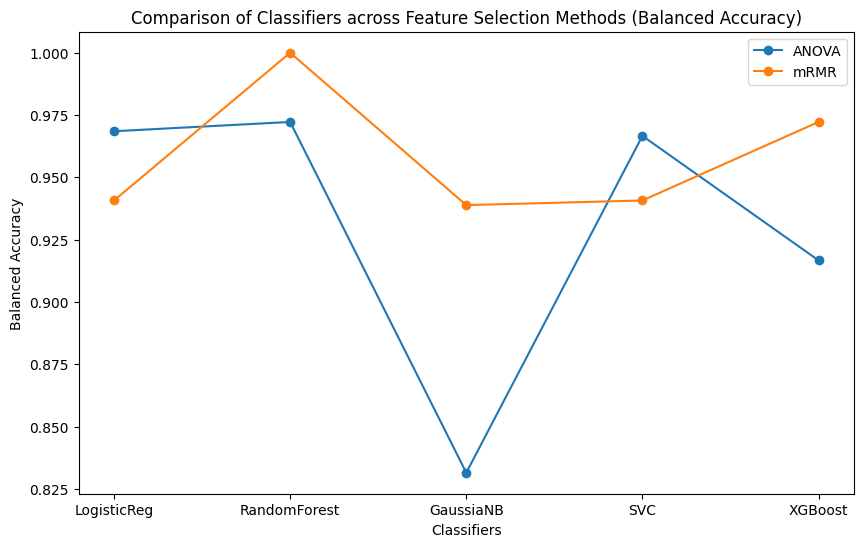

In [ ]:
plt.figure(figsize=(10, 6)) # Create a new figure with a specified size

# Plot a line chart showing the 'anova_scores' on the y-axis against the 'classifiers' on the x-axis.
# The 'anova_scores' represent the performance (Balanced Accuracy) of classifiers using feature selection with the ANOVA method.
plt.plot(classifiers, anova_scores, marker='o', label='ANOVA')

# Plot another line chart showing the 'mrmr_scores' on the y-axis against the 'classifiers' on the x-axis.
# The 'mrmr_scores' represent the performance (Balanced Accuracy) of classifiers using feature selection with the mRMR (minimum Redundancy Maximum Relevance) method.
plt.plot(classifiers, mrmr_scores, marker='o', label='mRMR')

plt.xlabel('Classifiers')
plt.ylabel('Balanced Accuracy')
plt.title('Comparison of Classifiers across Feature Selection Methods (Balanced Accuracy)')
plt.legend()
plt.show()

In [ ]:
anova_scores # print the metric's score for every classifier (ANOVA used)

[0.9684908789386402,
 0.9722222222222222,
 0.8314676616915423,
 0.9666252072968491,
 0.9166666666666667]

In [ ]:
mrmr_scores # print the metric's score for every classifier (mRMR used)

[0.9407131011608623,
 1.0,
 0.9388474295190713,
 0.9407131011608623,
 0.9722222222222222]

## Precision specific

In [ ]:
anova_scores_prec = [precision_LR, precision_RF, precision_GNB, precision_SVC, precision_XG]
mrmr_scores_prec = [precision_mrmr_LR, precision_mrmr_RF, precision_mrmr_GNB, precision_mrmr_SVC, precision_mrmr_XG]

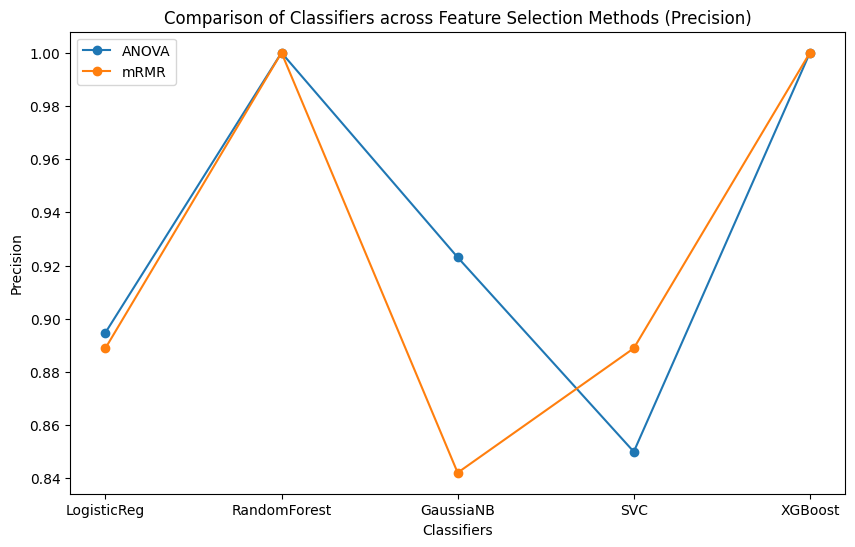

In [ ]:
plt.figure(figsize=(10, 6))

# Plot a line chart showing the 'anova_scores' on the y-axis against the 'classifiers' on the x-axis.
# The 'anova_scores' represent the performance (Precision) of classifiers using feature selection with the ANOVA method.
plt.plot(classifiers, anova_scores_prec, marker='o', label='ANOVA')

# Plot another line chart showing the 'mrmr_scores' on the y-axis against the 'classifiers' on the x-axis.
# The 'mrmr_scores' represent the performance (Precision) of classifiers using feature selection with the mRMR (minimum Redundancy Maximum Relevance) method.
plt.plot(classifiers, mrmr_scores_prec, marker='o', label='mRMR')
plt.xlabel('Classifiers')
plt.ylabel('Precision')
plt.title('Comparison of Classifiers across Feature Selection Methods (Precision)')
plt.legend()
plt.show()

In [ ]:
anova_scores_prec # print the metric's score for every classifier (ANOVA used)

[0.8947368421052632, 1.0, 0.9230769230769231, 0.85, 1.0]

In [ ]:
mrmr_scores_prec # print the metric's score for every classifier (mRMR used)

[0.8888888888888888, 1.0, 0.8421052631578947, 0.8888888888888888, 1.0]

## Recall

In [ ]:
anova_scores_rec = [recall_LR, recall_RF, recall_GNB, recall_SVC, recall_XG]
mrmr_scores_rec = [recall_mrmr_LR, recall_mrmr_RF, recall_mrmr_GNB, recall_mrmr_SVC, recall_mrmr_XG]

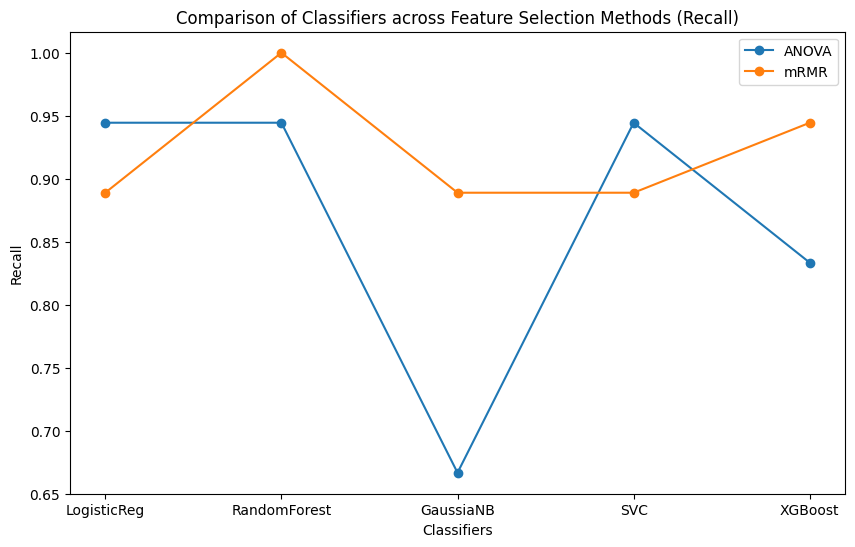

In [ ]:
plt.figure(figsize=(10, 6))

# Plot a line chart showing the 'anova_scores' on the y-axis against the 'classifiers' on the x-axis.
# The 'anova_scores' represent the performance (Recall) of classifiers using feature selection with the ANOVA method.
plt.plot(classifiers, anova_scores_rec, marker='o', label='ANOVA')

# Plot another line chart showing the 'mrmr_scores' on the y-axis against the 'classifiers' on the x-axis.
# The 'mrmr_scores' represent the performance (Recall) of classifiers using feature selection with the mRMR (minimum Redundancy Maximum Relevance) method.
plt.plot(classifiers, mrmr_scores_rec, marker='o', label='mRMR')
plt.xlabel('Classifiers')
plt.ylabel('Recall')
plt.title('Comparison of Classifiers across Feature Selection Methods (Recall)')
plt.legend()
plt.show()

In [ ]:
anova_scores_rec # print the metric's score for every classifier (ANOVA used)

[0.9444444444444444,
 0.9444444444444444,
 0.6666666666666666,
 0.9444444444444444,
 0.8333333333333334]

In [ ]:
mrmr_scores_rec # print the metric's score for every classifier (mRMR used)

[0.8888888888888888,
 1.0,
 0.8888888888888888,
 0.8888888888888888,
 0.9444444444444444]

## F1 score specific

In [ ]:
anova_scores_f1 = [f1_LR, f1_RF, f1_GNB, f1_SVC, f1_XG]
mrmr_scores_f1 = [f1_mrmr_LR, f1_mrmr_RF, f1_mrmr_GNB, f1_mrmr_SVC, f1_mrmr_XG]

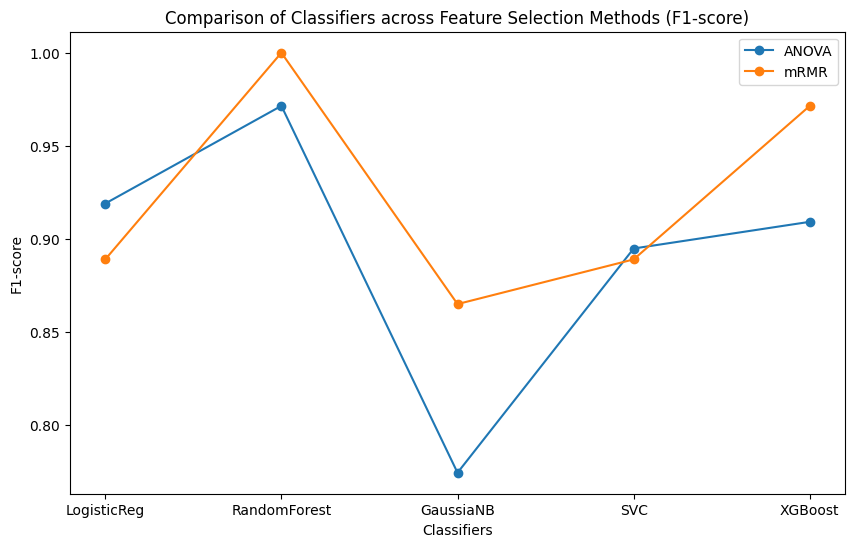

In [ ]:
plt.figure(figsize=(10, 6))

# Plot a line chart showing the 'anova_scores' on the y-axis against the 'classifiers' on the x-axis.
# The 'anova_scores' represent the performance (F1-score) of classifiers using feature selection with the ANOVA method.
plt.plot(classifiers, anova_scores_f1, marker='o', label='ANOVA')

# Plot another line chart showing the 'mrmr_scores' on the y-axis against the 'classifiers' on the x-axis.
# The 'mrmr_scores' represent the performance (F1-score) of classifiers using feature selection with the mRMR (minimum Redundancy Maximum Relevance) method.
plt.plot(classifiers, mrmr_scores_f1, marker='o', label='mRMR')
plt.xlabel('Classifiers')
plt.ylabel('F1-score')
plt.title('Comparison of Classifiers across Feature Selection Methods (F1-score)')
plt.legend()
plt.show()

In [ ]:
anova_scores_f1 # print the metric's score for every classifier (ANOVA used)

[0.918918918918919,
 0.9714285714285714,
 0.7741935483870968,
 0.8947368421052632,
 0.9090909090909091]

In [ ]:
mrmr_scores_f1 # print the metric's score for every classifier (mRMR used)

[0.8888888888888888,
 1.0,
 0.8648648648648649,
 0.8888888888888888,
 0.9714285714285714]